# Linear Regression

In [1]:
import numpy as np
from numpy.random import default_rng

from matplotlib import pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import clear_output, display, HTML
import ipywidgets as widgets

N=5 data points (x,y) given as two vectors X and Y.

In [2]:
data_X = np.array([-4,   -2,   1,  2.5,  3.9])
data_Y = np.array([-0.9, -0.4, 1.7, 1.5,  2.05])
print(data_X[:None].shape)

(5,)


Text(0.5, 1.0, 'Data')

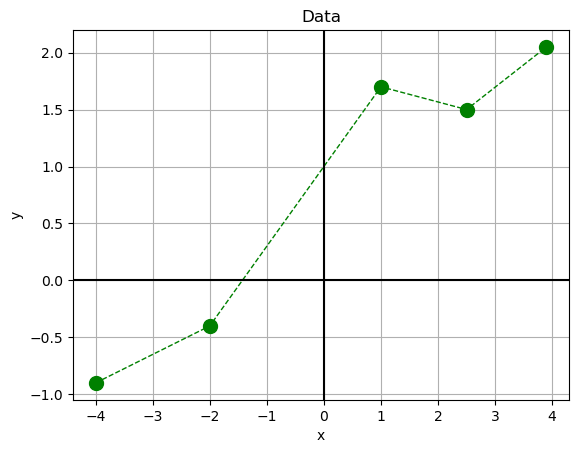

In [3]:
plt.plot(data_X, data_Y, '--og', linewidth = 1, markersize=10)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')

Ttake a value x and predict $\hat{y}$.
$$
\hat{y} = a \cdot x + b
$$

In [5]:
lin_function = lambda x, a, b : a*x+b
# evaluate the model:
y = lin_function(-4, 0.5, 1.0)
print(y)
#We can pass a vector (array) to the lambda expression 
Y = lin_function(data_X, 0.5, 1.0)
print(Y)

-1.0
[-1.    0.    1.5   2.25  2.95]


In [7]:
def plt_linear_model(a = 0.1, b = 0.2, X = data_X, Y = data_Y, show_error_squares=False):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes()
    
    y = lin_function(X, a, b)

    if show_error_squares:
        ax.plot(X, y, '-xb', linewidth=2)
    else:
        ax.plot(X, y, '-b', linewidth=2)
        
    ax.plot(X, Y, '--og', linewidth=1)
    ax.axhline(y=0, color='tab:gray')
    ax.axvline(x=0, color='tab:gray')
    ax.grid()
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    N = len(X)

    if show_error_squares:
        Esum = 0.
        for i in range(N):
            xi = X[i]
            yi = Y[i]
            y_hat = lin_function(xi, a, b)
            err = yi-y_hat # difference between data and model estimate
            Esum += (err**2)/2.
            if abs(err) > 0.01 :
                sq = plt.Rectangle( (xi, yi), abs(err), -err , alpha=0.2, color='r')
                ax.add_patch(sq)
                ax.plot([xi, xi], [yi, y_hat], linewidth=3, color='r')
        ax.set_title("Linear Model Params: a={:.3}, b={:.3}\nMean squared error (MSE) = {:.4f}".format(a, b, Esum/N))
    else:
        ax.set_title("Linear Model Params: a={:.3}, b={:.3}".format(a, b))
    return a, b

(-0.2, 0.0)

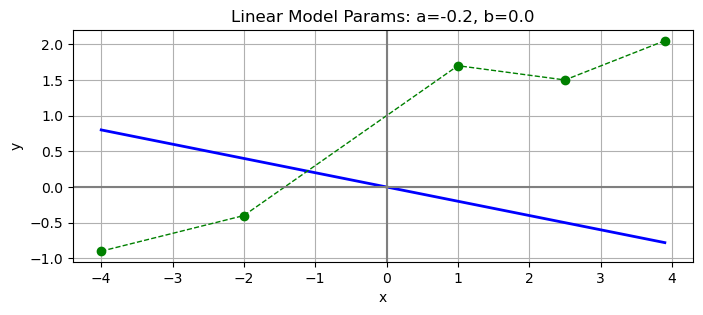

In [11]:
# Guess some value for slope (parameter a) and intercept (parameter b).
# Compare your guess with the data:
plt_linear_model(a = -0.2, b = 0.)

(0.2, -0.2)

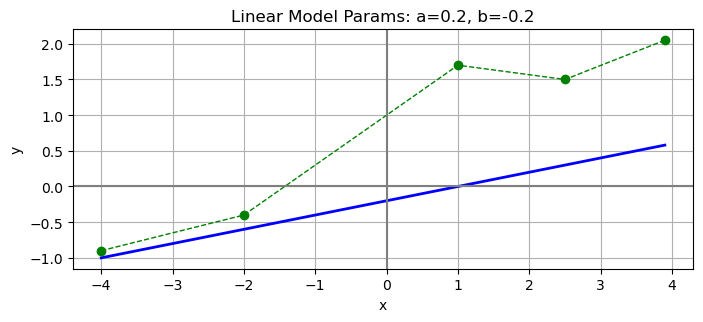

In [8]:
# plt_linear_model example 2
plt_linear_model(a = 0.2, b = -0.2)

## Manual fitting

In [9]:
w = interact(plt_linear_model, 
             a=widgets.FloatSlider(min=-1.0, max=1.0, step=0.02, value=-0.1),
             b=widgets.FloatSlider(min=-2.0, max=2.0, step=0.02, value=+1.5),
             X=fixed(data_X),
             Y=fixed(data_Y),
             show_error_squares = fixed(True))
display(w)

interactive(children=(FloatSlider(value=-0.1, description='a', max=1.0, min=-1.0, step=0.02), FloatSlider(valu…

<function __main__.plt_linear_model(a=0.1, b=0.2, X=array([-4. , -2. ,  1. ,  2.5,  3.9]), Y=array([-0.9 , -0.4 ,  1.7 ,  1.5 ,  2.05]), show_error_squares=False)>

# Loss Function

For each data point $(x_i, y_i)$ compare the given value $y_i$ with the value $\hat{y}_i$ predicted by the model. The total error is calculated as the sum (over N given data points) of the squared differences, divided by N. The error is (often) divided by 2.

$$
\begin{align}
\hat{y}_i &= a \cdot x_i + b \\
e_i &= y_i - \hat{y}_i   \\
E &= \frac{1}{2N}\sum_{i=1}^N e_i^2 \\
&= \frac{1}{2N}\sum_{i=1}^N (\hat{y} - (a \cdot x_i + b) )^2
\end{align}
$$

Known as the **Mean Squared Error (MSE)** (divided by 2).




(0.2, -0.2)

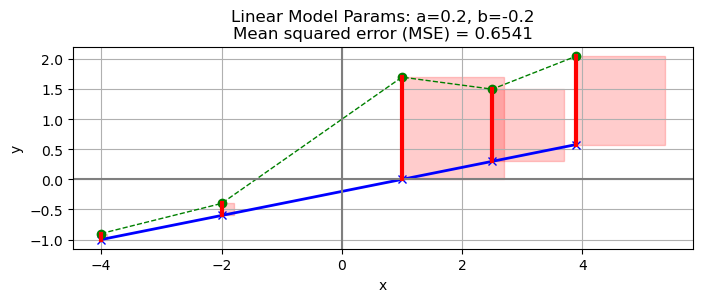

In [10]:
# plot the model and visualize the loss
plt_linear_model(a=0.2, b= -0.2,show_error_squares=True)

(0.5, 1.0)

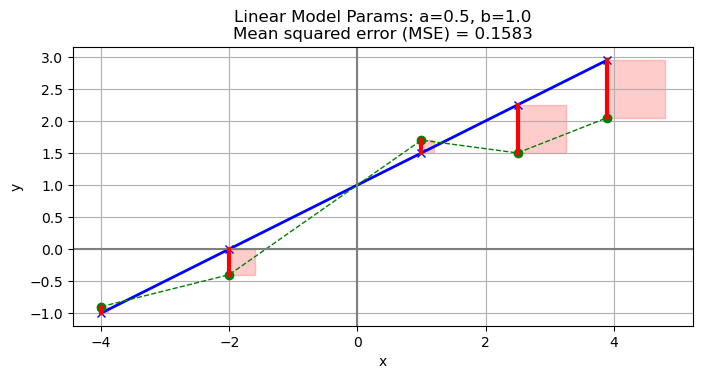

In [11]:
# example 2: 
plt_linear_model( a=0.5, b=1.0,show_error_squares=True)

# Interactive MSE minimization


In [12]:
# Example 3: Using the interactive widget, find the optimal fit

w = interact(plt_linear_model, 
             a=widgets.FloatSlider(min=-0.5, max=0.8, step=0.02, value=0.1),
             b=widgets.FloatSlider(min=-1.0, max=1.0, step=0.02, value=0.5),
             X=fixed(data_X),
             Y=fixed(data_Y),
             show_error_squares = fixed(True))
display(w)

interactive(children=(FloatSlider(value=0.1, description='a', max=0.8, min=-0.5, step=0.02), FloatSlider(value…

<function __main__.plt_linear_model(a=0.1, b=0.2, X=array([-4. , -2. ,  1. ,  2.5,  3.9]), Y=array([-0.9 , -0.4 ,  1.7 ,  1.5 ,  2.05]), show_error_squares=False)>

## Fitting a linear model

In [16]:
from sklearn import linear_model
# create a LinearRegression object
lin_model = linear_model.LinearRegression()
# fit the model to the data. Note the reshape function.
data_X_array = data_X.reshape(-1, 1)
display(data_X_array)
display(data_X_array.shape)

array([[-4. ],
       [-2. ],
       [ 1. ],
       [ 2.5],
       [ 3.9]])

(5, 1)

In [18]:
# calling fit() will compute the model parameters. 
lin_model.fit(data_X_array, data_Y)

LinearRegression()

In [19]:
a = lin_model.coef_[0]
b = lin_model.intercept_
display( (a, b) )

(0.39790339450413614, 0.6785870495388419)

In [20]:
# we can use the model to predict values.
y_hat = lin_model.predict(data_X_array)
display(y_hat)
display(y_hat.shape)

array([-0.91302653, -0.11721974,  1.07649044,  1.67334554,  2.23041029])

(5,)

In [22]:
#predict new data
y_hat = lin_model.predict([[0.8]])
print(y_hat)

[0.99690977]


we can predict multiple y_hat at once:

In [23]:
y_hat = lin_model.predict(data_X_array)

Text(0.5, 1.0, 'Simple linear regression')

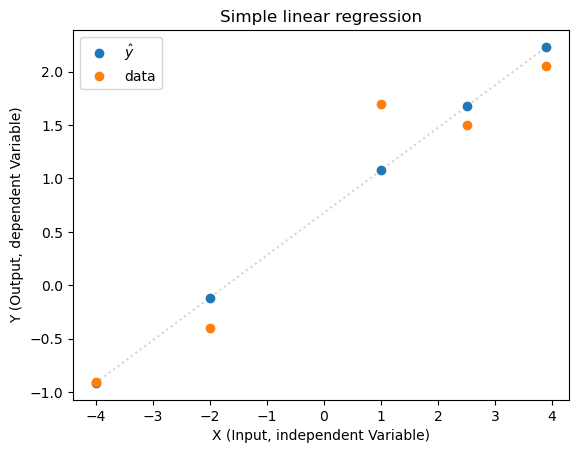

In [24]:
# plot the result
plt.plot(data_X, y_hat, ':', label=None, color = 'lightgrey')
plt.plot(data_X_array, y_hat, 'o', label='$\hat{y}$')
plt.plot(data_X_array, data_Y, 'o', label='data')
plt.legend()
plt.xlabel('X (Input, independent Variable)')
plt.ylabel('Y (Output, dependent Variable)')
plt.title('Simple linear regression')